# TIMIT

Converted dataset into WAVE From NIST and preprocessing structure of dataset done

PENDING:
- Monoaudio to 2 channels for multi microphone
- apply a linear filter, band-pass filter
- Pyroomacoustics library can help add NOISE with room impulse responses (RIRs)

In [2]:
import wave
import os
import random
import shutil
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import sounddevice as sd
import pyroomacoustics as pra
from pydub import AudioSegment

C:\Users\nikhi\AppData\Local\Temp\ipykernel_17976\3548646116.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### NIST to WAVE, remove unwanted files

In [10]:
os.listdir(PATH+regions[0] + "/FCJF0")

['SA1.PHN',
 'SA1.TXT',
 'SA1.WAV',
 'SA1.WRD',
 'SA2.PHN',
 'SA2.TXT',
 'SA2.WAV',
 'SA2.WRD',
 'SI1027.PHN',
 'SI1027.TXT',
 'SI1027.WAV',
 'SI1027.WRD',
 'SI1657.PHN',
 'SI1657.TXT',
 'SI1657.WAV',
 'SI1657.WRD',
 'SI648.PHN',
 'SI648.TXT',
 'SI648.WAV',
 'SI648.WRD',
 'SX127.PHN',
 'SX127.TXT',
 'SX127.WAV',
 'SX127.WRD',
 'SX217.PHN',
 'SX217.TXT',
 'SX217.WAV',
 'SX217.WRD',
 'SX307.PHN',
 'SX307.TXT',
 'SX307.WAV',
 'SX307.WRD',
 'SX37.PHN',
 'SX37.TXT',
 'SX37.WAV',
 'SX37.WRD',
 'SX397.PHN',
 'SX397.TXT',
 'SX397.WAV',
 'SX397.WRD']

In [3]:
PATH = "E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/"
regions = ['DR1', 'DR2', 'DR3', 'DR4', 'DR5', 'DR6', 'DR7', 'DR8']

In [33]:
wavfile

'E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/DR1/FCJF0/SA1.WAV'

In [13]:
with open("E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/DR1/FCJF0/SI1657.WAV", 'rb') as f:
    data = f.readlines()
print(len(data), data)

290 [b'NIST_1A\n', b'   1024\n', b'database_id -s5 TIMIT\n', b'database_version -s3 1.0\n', b'utterance_id -s11 cjf0_si1657\n', b'channel_count -i 1\n', b'sample_count -i 45466\n', b'sample_rate -i 16000\n', b'sample_min -i -1681\n', b'sample_max -i 2612\n', b'sample_n_bytes -i 2\n', b'sample_byte_format -s2 01\n', b'sample_sig_bits -i 16\n', b'end_head\n', b'\n', b'\n', b'\n', b'\n', b'                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [19]:
import numpy as np
from scipy.io.wavfile import write
import struct

def read_nist_wav(file_path):
    with open(file_path, 'rb') as file:
        header = file.read(1024) # 1024 bits header 

        header_lines = header.decode('utf-8').splitlines()

        
        sample_rate = None
        sample_count = None
        sample_size = None
        num_channels = None
        for line in header_lines:
            if 'sample_rate' in line:
                sample_rate = int(line.split()[2])
            elif 'sample_count' in line:
                sample_count = int(line.split()[2])
            elif 'sample_n_bytes' in line:
                sample_size = int(line.split()[2])
            elif 'channel_count' in line:
                num_channels = int(line.split()[2])

        if not sample_rate or not sample_count or not sample_size or not num_channels:
            raise ValueError("Missing necessary metadata in the NIST header.")

        audio_data = file.read()
        dtype = np.int16 if sample_size == 2 else np.int8
        audio_array = np.frombuffer(audio_data, dtype=dtype)

        audio_array = audio_array.reshape((-1, num_channels))

        return audio_array, sample_rate, sample_count, num_channels



audio_array, sample_rate, sample_count, num_channels = read_nist_wav(wavfile)

# print(f"Audio Type: {audio_array.dtype}")
# print(f"Sample Rate: {sample_rate}")
# print(f"Number of Samples: {sample_count}")
# print(f"Number of Channels: {num_channels}")


In [20]:


def convert_nist_to_wav(audio_array, sample_rate, file_path):
    if audio_array.dtype != np.int16:
        audio_array = np.int16(audio_array)

    # Write the audio array to a WAV file using scipy.io.wavfile.write
    write(file_path, sample_rate, audio_array)

    print(f"File saved to {file_path}")


# output_file_path = './output_audio.wav'
# convert_nist_to_wav(audio_array, sample_rate, output_file_path)


In [22]:
def NIST_to_WAV(path, output_path):
    audio_array, sample_rate, sample_count, num_channels = read_nist_wav(path)
    convert_nist_to_wav(audio_array, sample_rate, output_path)
NIST_to_WAV("E:/ML/Datasets/TIMIT/data/lisa/data/timit/raw/TIMIT/TRAIN/DR4/FBAS0/SA1.WAV", "./output.wav")

File saved to ./output.wav


In [27]:
count = 0
for root, _, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN"):
    for file in files:
        if not file.lower().endswith('.wav'):
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Removed: {file}")
            count += 1
print(f"Total number of files removed: {count}")

Removed: SA1.PHN
Removed: SA1.TXT
Removed: SA1.WRD
Removed: SA2.PHN
Removed: SA2.TXT
Removed: SA2.WRD
Removed: SI1027.PHN
Removed: SI1027.TXT
Removed: SI1027.WRD
Removed: SI1657.PHN
Removed: SI1657.TXT
Removed: SI1657.WRD
Removed: SI648.PHN
Removed: SI648.TXT
Removed: SI648.WRD
Removed: SX127.PHN
Removed: SX127.TXT
Removed: SX127.WRD
Removed: SX217.PHN
Removed: SX217.TXT
Removed: SX217.WRD
Removed: SX307.PHN
Removed: SX307.TXT
Removed: SX307.WRD
Removed: SX37.PHN
Removed: SX37.TXT
Removed: SX37.WRD
Removed: SX397.PHN
Removed: SX397.TXT
Removed: SX397.WRD
Removed: SA1.PHN
Removed: SA1.TXT
Removed: SA1.WRD
Removed: SA2.PHN
Removed: SA2.TXT
Removed: SA2.WRD
Removed: SI1271.PHN
Removed: SI1271.TXT
Removed: SI1271.WRD
Removed: SI1406.PHN
Removed: SI1406.TXT
Removed: SI1406.WRD
Removed: SI2036.PHN
Removed: SI2036.TXT
Removed: SI2036.WRD
Removed: SX146.PHN
Removed: SX146.TXT
Removed: SX146.WRD
Removed: SX236.PHN
Removed: SX236.TXT
Removed: SX236.WRD
Removed: SX326.PHN
Removed: SX326.TXT
Remov

In [29]:
count = 0
for root, dirs, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN"):
    print(files)
    for file in files:
        count += 1
print(f"Total number of files: {count}")

[]
[]
['SA1.WAV', 'SA2.WAV', 'SI1027.WAV', 'SI1657.WAV', 'SI648.WAV', 'SX127.WAV', 'SX217.WAV', 'SX307.WAV', 'SX37.WAV', 'SX397.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1271.WAV', 'SI1406.WAV', 'SI2036.WAV', 'SX146.WAV', 'SX236.WAV', 'SX326.WAV', 'SX416.WAV', 'SX56.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1149.WAV', 'SI1779.WAV', 'SI2075.WAV', 'SX159.WAV', 'SX249.WAV', 'SX339.WAV', 'SX429.WAV', 'SX69.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1418.WAV', 'SI2048.WAV', 'SI788.WAV', 'SX158.WAV', 'SX248.WAV', 'SX338.WAV', 'SX428.WAV', 'SX68.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1148.WAV', 'SI1778.WAV', 'SI518.WAV', 'SX158.WAV', 'SX248.WAV', 'SX338.WAV', 'SX428.WAV', 'SX68.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1434.WAV', 'SI1763.WAV', 'SI804.WAV', 'SX174.WAV', 'SX264.WAV', 'SX354.WAV', 'SX444.WAV', 'SX84.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1608.WAV', 'SI2238.WAV', 'SI978.WAV', 'SX168.WAV', 'SX258.WAV', 'SX348.WAV', 'SX438.WAV', 'SX78.WAV']
['SA1.WAV', 'SA2.WAV', 'SI1377.WAV', 'SI2007.WAV', 'SI747.WAV', 'SX117.WAV', 'SX207.WAV', 'SX297

In [30]:
remain = 0 # remaining files
count = 0
for root, _, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST"):
    for file in files:
        if not file.lower().endswith('.wav'):
            file_path = os.path.join(root, file)
            os.remove(file_path)
            count += 1
        else:
            remain += 1
print(f"Total number of files removed: {count}, files remaining: {remain}")

Total number of files removed: 5040, files remaining: 1680


In [36]:
count = 0
for root, dirs, files in os.walk(r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST"):
    for file in files:
        count += 1
        file_path = os.path.join(root,file)
        NIST_to_WAV(file_path, file_path)
        if (count % 100 == 0):
            print(count)

File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SA1.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SA2.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SI1573.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SI2203.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SI943.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX133.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX223.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX313.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX403.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FAKS0\SX43.WAV
File saved to C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TEST\DR1\FDAC1\SA1.WAV
File saved to C:\Users\nikhi\Desktop\

### Pyroomacoustics sample

In [2]:
wavefile = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0\SA1.WAV"

In [3]:
fs_near, near_end_signal = wav.read(wavefile)
fs_near

16000

In [4]:
# Generate far-end noise signals
duration_seconds = len(near_end_signal) / fs_near  # Match the duration of the near-end signal
far_end_noise1 = np.random.normal(0, 1, int(fs_near * duration_seconds))  # White noise
far_end_noise2 = np.random.normal(0, 1, int(fs_near * duration_seconds))  # White noise
duration_seconds

2.9248125

In [5]:
room_dim = [10, 7, 3] # L x W x H

room = pra.ShoeBox(
    room_dim,
    fs=fs_near,                # Sample freq
    max_order=3,          # Maximum reflection order
    absorption=0.2        # Wall absorption coeff
)

In [6]:
# Add far-end noise sources
far_source1_location = [1, 1, 1.5]  # (x, y, z)
far_source2_location = [8, 6, 2]    # (x, y, z)
room.add_source(far_source1_location, signal=far_end_noise1)
room.add_source(far_source2_location, signal=far_end_noise2)

# Add near-end source
near_source_location = [3, 3, 1.5]  # (x, y, z)
room.add_source(near_source_location, signal=near_end_signal)

In [7]:
mic_location = np.array([[5, 5, 1.5]]).T  # Mic 1 at 5,5,1.5
room.add_microphone_array(mic_location)

In [8]:
room.simulate()

In [9]:
mic_signals = room.mic_array.signals[0] # mixed signals in Mic 1

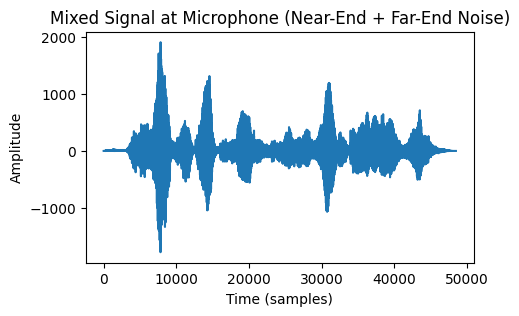

In [10]:
plt.figure(figsize=(5, 3))
plt.plot(mic_signals)
plt.title("Mixed Signal at Microphone (Near-End + Far-End Noise)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

# import scipy.io.wavfile as wav
# wav.write("echoed_signal.wav", 16000, mic_signals[0].astype(np.int16))

In [11]:
def play_raw_signal(signal, description, sample_rate=16000):
    print(f"Playing: {description}")
    # Normalize signal to -1.0 to 1.0 range
    if np.max(np.abs(signal)) > 1.0:
        signal = signal / np.max(np.abs(signal))
    # Play the signal directly
    sd.play(signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print(f"Finished: {description}\n")


In [13]:
play_raw_signal(far_end_noise1, "Far-End Noise 1")
play_raw_signal(far_end_noise2, "Far-End Noise 2")
play_raw_signal(near_end_signal, "Near-End Signal")
play_raw_signal(mic_signals, "Mixed Signal Mic 1")

Playing: Far-End Noise 1
Finished: Far-End Noise 1

Playing: Far-End Noise 2
Finished: Far-End Noise 2

Playing: Near-End Signal
Finished: Near-End Signal

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



### Merge and split to 8 seconds

In [182]:
path = "C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR1"

In [180]:
files = os.listdir(path+"/"+speakers[0])
files

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR8/FBCG1.wav'

In [183]:
os.path.basename(path.rstrip(os.sep))

'DR1'

In [184]:
def merge_wav_files(directory):
    parent_dir_name = os.path.basename(directory.rstrip(os.sep))
    current_folder_name = os.path.basename(directory.rstrip(os.sep))
    
    # Initialize an empty AudioSegment
    combined_audio = AudioSegment.empty()
    
    wav_files = [f for f in os.listdir(directory) if f.endswith(".WAV")]
    wav_files.sort()
    
    # Load and append each WAV file
    for wav_file in wav_files:
        file_path = os.path.join(directory, wav_file)
        audio = AudioSegment.from_file(file_path, format="wav")
        combined_audio += audio  # Append to the combined audio

    
    # Save the merged audio with the parent directory name
    output_file = directory+".wav"
    #print(output_file)
    combined_audio.export(output_file, format="wav")
    print(f"Merged WAV file saved as: {output_file}")

    # Delete the original WAV files
    for wav_file in wav_files:
        file_path = os.path.join(directory, wav_file)
        os.remove(file_path)


In [185]:
speakers = os.listdir(path)
for speaker in speakers:
    input_directory = path+"/"+speaker
    
    merge_wav_files(input_directory)
    

NotADirectoryError: [WinError 267] The directory name is invalid: 'C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT/TRAIN/DR1/FCJF0.wav'

In [186]:
def split_wav_files(input_directory, leftover_directory, clip_duration=8000):
    os.makedirs(leftover_directory, exist_ok=True)
    wave_files = os.listdir(input_directory)
    
    # Process each WAV file in the directory
    for wav_file in wave_files:
        if wav_file.endswith(".wav"):
            file_path = os.path.join(input_directory, wav_file)
            #print(f"Processing: {wav_file}")
            
            audio = AudioSegment.from_file(file_path, format="wav")
            audio_length = len(audio)  # Length in milliseconds
            filename, _ = os.path.splitext(wav_file)
            for i in range(0, audio_length, clip_duration):
                clip = audio[i:i + clip_duration]
                if len(clip) == clip_duration:
                    output_file = os.path.join(input_directory, f"{filename}_{i // clip_duration + 1}.wav")
                else:
                    output_file = os.path.join(leftover_directory, f"{filename}_leftover.wav")
                
                clip.export(output_file, format="wav")
                print(f"Saved: {output_file}")

    

In [187]:
leftover_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers"
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR2"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR3"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR4"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR5"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR6"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR7"
split_wav_files(input_directory, leftover_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR8"
split_wav_files(input_directory, leftover_directory)

Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_1.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_2.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_3.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers\FCJF0_leftover.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_1.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_2.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_3.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers\FDAW0_leftover.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDML0_1.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDML0_2.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDML0_3.wav
Saved: C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\leftovers\FDML0_leftover.wav
Saved: C:\Users\nikhi\Des

In [188]:
def remove_original_files(input_directory):
    wave_files = os.listdir(input_directory)
    for file in wave_files:
        if ('_' not in file):
            f = os.path.join(input_directory, file)
            os.remove(f)


In [189]:
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR2"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR3"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR4"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR5"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR6"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR7"
remove_original_files(input_directory)
input_directory = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR8"
remove_original_files(input_directory)

In [190]:
# pyroomacoustics below

In [7]:
wavefile1 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FCJF0_1.WAV"
wavefile2 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FDAW0_1.WAV"
wavefile3 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT\TRAIN\DR1\FECD0_1.WAV"

In [8]:
fs_near1, near_end_signal1 = wav.read(wavefile1)
fs_far1, far_end_signal1 = wav.read(wavefile2)
fs_far2, far_end_signal2 = wav.read(wavefile3)
duration_seconds = len(near_end_signal1) / fs_near1  # Match the duration of the near-end signal
fs_near1, duration_seconds

(16000, 6.0)

In [9]:
room_dim = [10, 7, 3] # L x W x H

room = pra.ShoeBox(
    room_dim,
    fs=fs_near1,          # Sample freq
    max_order=3,          # Maximum reflection order
    absorption=0.2        # Wall absorption coeff
)

In [10]:
# Adding source and location
far_source1_location = [1, 1, 1.5]  # (x, y, z)
far_source2_location = [8, 6, 2]
near_source_location = [3, 3, 1.5]

room.add_source(far_source1_location, signal=far_end_signal1)
room.add_source(far_source2_location, signal=far_end_signal2)
room.add_source(near_source_location, signal=near_end_signal1)

In [11]:
mic_location = np.array([[5, 5, 1.5]]).T  # Mic 1 at 5,5,1.5
room.add_microphone_array(mic_location)
room.simulate()
mic_signals = room.mic_array.signals[0] # mixed signals in Mic 1

In [13]:
def play_raw_signal(signal, description, sample_rate=16000):
    print(f"Playing: {description}")
    # Normalize signal to -1.0 to 1.0 range
    if np.max(np.abs(signal)) > 1.0:
        signal = signal / np.max(np.abs(signal))
    # Play the signal directly
    sd.play(signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print(f"Finished: {description}\n")


In [14]:
play_raw_signal(far_end_signal1, "Far-End Noise 1")
play_raw_signal(far_end_signal2, "Far-End Noise 2")
play_raw_signal(near_end_signal1, "Near-End Signal")
play_raw_signal(mic_signals, "Mixed Signal Mic 1")

Playing: Far-End Noise 1
Finished: Far-End Noise 1

Playing: Far-End Noise 2
Finished: Far-End Noise 2

Playing: Near-End Signal
Finished: Near-End Signal

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



In [42]:
wav.write("mixed_signal.wav", 16000, mic_signals.astype(np.int16))
wav.write("near_end_signal.wav", 16000, near_end_signal1.astype(np.int16))
wav.write("far_end_signal1.wav", 16000, far_end_signal1.astype(np.int16))
wav.write("far_end_signal2.wav", 16000, far_end_signal2.astype(np.int16))

### Scaling Amplitude

In [69]:
def scale_amplitude(signal, scaling_factor=-0.2):
    scaled_signal = signal * scaling_factor
    return scaled_signal

In [70]:
base_path = "C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/"
dirs = os.listdir(base_path)
dirs.remove("leftovers")
dirs

['DR1', 'DR2', 'DR3', 'DR4', 'DR5', 'DR6', 'DR7', 'DR8']

In [72]:
# far end files scale down 
for dir in dirs:
    folder = os.path.join(base_path, dir)
    for path, _, files in os.walk(folder):
        for file in files:
            filepath = path+"/"+file
            sr, signal = wav.read(filepath)
            scaled = scale_amplitude(signal, -0.2)
            wav.write(filepath, 16000, scaled.astype(np.int16))
        print("completed", path)

completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR1
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR2
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR3
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR4
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR5
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR6
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR7
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR8


In [78]:
# near end files scale up and add 1 second
base_path = "C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/"
for dir in dirs:
    folder = os.path.join(base_path, dir)
    for path, _, files in os.walk(folder):
        for file in files:
            filepath = path+"/"+file
            padded_data = pad_with_silence(filepath, 1)
            scaled = scale_amplitude(padded_data, 5)
            wav.write(filepath, 16000, scaled.astype(np.int16))
        print("completed", path)

completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR1
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR2
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR3
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR4
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR5
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR6
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR7
completed C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/DR8


### Randomly Generate Mixed Files

In [43]:
def scale_amplitude(signal, scaling_factor):
    scaled_signal = signal * scaling_factor
    return scaled_signal

In [44]:
def play_raw_signal(signal, description, sample_rate=16000):
    print(f"Playing: {description}")
    # Play the signal directly
    sd.play(signal, samplerate=sample_rate)
    sd.wait()  # Wait until playback is finished
    print(f"Finished: {description}\n")


In [37]:
# function for generating random signal locations, within room dimenstions
def get_random_locations(x_limit=15, y_limit=10, z_limit=5): 
    mic1_location = [random.randint(1, x_limit-1), random.randint(1, y_limit), random.randint(1, z_limit)]
    far_source1_location = [random.randint(1, x_limit-1), random.randint(1, y_limit), random.randint(1, z_limit)]
    far_source2_location = [random.randint(1, x_limit-1), random.randint(1, y_limit), random.randint(1, z_limit)]
    near_source_location = [random.randint(1, x_limit-1), random.randint(1, y_limit), random.randint(1, z_limit)]
    return mic1_location, far_source1_location, far_source2_location, near_source_location
a,b,c,d = get_random_locations()
a,b,c

([12, 9, 2], [3, 5, 2], [14, 6, 5])

In [45]:
def pyroom(near_end, far_end1, far_end2, room_dim = [15, 10, 5], max_order=3, absorption=0.2):
    _, near_end_signal1 = wav.read(near_end)
    fs_near1, far_end_signal1 = wav.read(far_end1)
    _, far_end_signal2 = wav.read(far_end2)
    mic_source1, far_source1, far_source2, near_source = get_random_locations(room_dim[0], room_dim[1], room_dim[2]) # get random signal locations within room limits
    
    room = pra.ShoeBox(room_dim, fs=fs_near1, max_order=max_order, absorption=absorption)
    room.add_source(far_source1, signal=far_end_signal1)
    room.add_source(far_source2, signal=far_end_signal2)
    room.add_source(near_source, signal=near_end_signal1)

    mic_location = np.array([mic_source1]).T
    room.add_microphone_array(mic_location)
    room.simulate()
    mic_signals = room.mic_array.signals[0]
    return mic_signals, [fs_near1, mic_source1, far_source1, far_source2, near_source]


In [184]:
mixed, _ = pyroom(wavefile1, wavefile2, wavefile3)
play_raw_signal(mixed, "Mixed Signal Mic 1")

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



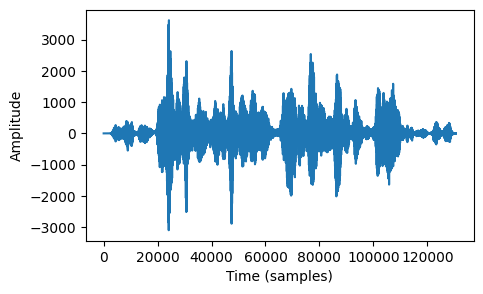

In [179]:
plt.figure(figsize=(5, 3))
plt.plot(mixed)
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [180]:
wav.write("mixed.wav", 16000, mixed.astype(np.int16))

In [21]:
def pick_two_different_files(file_names, key_file):
  try:
    file_names_without_key = [f for f in file_names if f != key_file]
    if len(file_names_without_key) < 2:
      return None
    indices = random.sample(range(len(file_names_without_key)), 2)
    file1 = file_names_without_key[indices[0]]
    file2 = file_names_without_key[indices[1]]
    return file1, file2

  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [218]:
input_file_path = "C:/Users/nikhi/Desktop/Project 2/code/data/input/"
output_file_path = "C:/Users/nikhi/Desktop/Project 2/code/data/output/"
id = 0
for dir in dirs:
    folder = os.path.join(base_path, dir)
    far_end_folder = "C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/" + dir
    far_end_files = os.listdir(far_end_folder)
    for path, _, files in os.walk(folder):
        for file in files:
            for i in range(5):
                id += 1
                picked_files = pick_two_different_files(far_end_files, file)
                if picked_files:
                    # print(file+" :", picked_files[0], picked_files[1])
                    key_file = path + "/" + file
                    far1_file = far_end_folder + "/" + picked_files[0]
                    far2_file = far_end_folder + "/" + picked_files[1]
                    # print(key_file, far1_file, far2_file)
    
                    mixed, source_locations = pyroom(key_file, far1_file, far2_file)
                    
                    
                    shutil.copy2(key_file, input_file_path+f"{id}.WAV")
                    wav.write(output_file_path+f"{id}.WAV", 16000, mixed.astype(np.int16))
                    # break
                else:
                  print("Not possible to pick two different files at", path)
        # print(path)
    # break

### Constant Frames for all files

In [8]:
def find_max_frames(input_dir, n_fft=512, hop_length=128):
    max_frames = 0
    files = os.listdir(input_dir)

    for file in files:
        file_path = os.path.join(input_dir, file)
        if file_path.endswith('.wav'):
            waveform, _ = torchaudio.load(file_path)
            stft_result = torch.stft(waveform.squeeze(0), n_fft=n_fft, hop_length=hop_length, return_complex=True)
            max_frames = max(max_frames, stft_result.size(-1))

    return max_frames


far = "./data/far_end/"
near = "./data/near_end/"
mixed = "./data/mixed/"
 
max_frames = find_max_frames(far)
print(f"The maximum number of frames in the dataset of far: {find_max_frames(far)}")
print(f"The maximum number of frames in the dataset of near: {find_max_frames(near)}")
print(f"The maximum number of frames in the dataset of mixed: {find_max_frames(mixed)}")

The maximum number of frames in the dataset of far: 1001
The maximum number of frames in the dataset of near: 1001
The maximum number of frames in the dataset of mixed: 1023


In [14]:
def count_frames_in_folder(folder_path, n_fft=512, hop_length=128):
    frame_counts = {}

    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith('.wav'):  # Process only WAV files
            waveform, _ = torchaudio.load(file_path)  # Load the audio file
            stft_result = torch.stft(waveform.squeeze(0), n_fft=n_fft, hop_length=hop_length, return_complex=True)
            num_frames = stft_result.size(-1)  # Get the number of frames
            frame_counts[file] = num_frames

    return frame_counts


frames_dict = count_frames_in_folder(mixed)
for file_name, num_frames in frames_dict.items():
    print(f"File: {file_name}, Number of Frames: {num_frames}")

File: 1.wav, Number of Frames: 1020
File: 10.wav, Number of Frames: 1020
File: 100.wav, Number of Frames: 1020
File: 1000.wav, Number of Frames: 1020
File: 10000.wav, Number of Frames: 1021
File: 10001.wav, Number of Frames: 1021
File: 10002.wav, Number of Frames: 1021
File: 10003.wav, Number of Frames: 1021
File: 10004.wav, Number of Frames: 1021
File: 10005.wav, Number of Frames: 1020
File: 10006.wav, Number of Frames: 1020
File: 10007.wav, Number of Frames: 1022
File: 10008.wav, Number of Frames: 1021
File: 10009.wav, Number of Frames: 1020
File: 1001.wav, Number of Frames: 1020
File: 10010.wav, Number of Frames: 1020
File: 10011.wav, Number of Frames: 1019
File: 10012.wav, Number of Frames: 1020
File: 10013.wav, Number of Frames: 1020
File: 10014.wav, Number of Frames: 1019
File: 10015.wav, Number of Frames: 1021
File: 10016.wav, Number of Frames: 1019
File: 10017.wav, Number of Frames: 1022
File: 10018.wav, Number of Frames: 1020
File: 10019.wav, Number of Frames: 1021
File: 1002.

In [15]:
def find_target_length(folders):
    max_length = 0
    for folder in folders:
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            if file_path.endswith('.wav'):
                waveform, _ = torchaudio.load(file_path)
                max_length = max(max_length, waveform.size(1))  # Get the length in samples
    return max_length

In [19]:
def pad_wave_files(folders, target_length):

    def pad_waveform(waveform, target_length):
        current_length = waveform.size(1)  # Number of samples
        if current_length < target_length:
            padding = target_length - current_length
            waveform = torch.nn.functional.pad(waveform, (0, padding))  # Pad at the end
        elif current_length > target_length:
            waveform = waveform[:, :target_length]  # Crop to target length
        return waveform

    for folder in folders:
        for file_name in os.listdir(folder):
            file_path = os.path.join(folder, file_name)
            if file_path.endswith('.wav'):
                waveform, sample_rate = torchaudio.load(file_path)
                padded_waveform = pad_waveform(waveform, target_length)
                torchaudio.save(file_path, padded_waveform, sample_rate)

    print(f"All WAV files padded to {target_length} samples.")

In [16]:
folders = [far, near, mixed]

target_length = find_target_length(folders)
print(f"Target length (in samples): {target_length}")

Target length (in samples): 130820


In [20]:
pad_wave_files(folders, target_length)

All WAV files padded to 130820 samples.


### 10k data to csv

In [ ]:
# Checking the count of files, to see if duplicates exist
far_end_folder = "C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/"
far_end_files = os.listdir(far_end_folder)
# for path, _, files in os.walk(folder):
far_end_files = far_end_files[:-1]
far_end_files
all_files = []
for file in far_end_files:
    for path, dir, files in os.walk(far_end_folder+file):
        print(path, len(files))
        all_files.extend(files)
print(len(all_files))
print(len(set(all_files)))
        

In [18]:
near_end = "C:/Users/nikhi/Desktop/Project 2/code/data/near_end/"
far_end = "C:/Users/nikhi/Desktop/Project 2/code/data/far_end/"
all_files = []
for file in far_end_files:
    for path, dir, DR_files in os.walk(far_end_folder+file):
        print(path, len(DR_files))
        for f in DR_files:
            cur_file = path+"/"+f
            shutil.copy2(cur_file, far_end)

C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR1 126
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR2 244
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR3 246
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR4 232
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR5 249
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR6 120
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR7 252
C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_far/TRAIN/DR8 66


In [54]:
count = 0
near_end_files = os.listdir(near_end)
far_end_files = os.listdir(far_end)
room_dim = [15, 10, 5]
max_order=3
absorption=0.2
mixed_path = "./data/mixed/"
near_end = "./data/near_end/"
far_end = "./data/far_end/"

data = []
count = 0
columns = ['mixed', 'near_end', 'far_end1', 'far_end2', 
           'mixed_path', 'near_end_path', 'far_end1_path', 'far_end2_path',
           'near_end_loc', 'far_end_loc1', 'far_end_loc2', 'mic_loc1',
           'room_dim', 'sample_freq', 'room_max_order', 'room_absorption']
df = pd.DataFrame(data, columns=columns)



for near_end_file in near_end_files:
    for i in range(5):
        picked_files = pick_two_different_files(far_end_files, near_end_file)
        count += 1
        mixed, source_locations = pyroom(f"{near_end}{near_end_file}", f"{far_end}{picked_files[0]}", f"{far_end}{picked_files[0]}", room_dim, max_order, absorption)
        [fs_near1, mic_source1, far_source1, far_source2, near_source] = source_locations
        
        df.loc[len(df)] = [f"{count}.wav", near_end_file, picked_files[0], picked_files[1], 
                           mixed_path+f"{count}.wav", f"{near_end}{near_end_file}", f"{far_end}{picked_files[0]}", f"{far_end}{picked_files[0]}",
                           near_source, far_source1, far_source2, mic_source1,
                           room_dim, fs_near1, max_order, absorption]
        wav.write(mixed_path+f"{count}.wav", 16000, mixed.astype(np.int16))
df.to_csv('data_details.csv', index=False)
print(df.shape)
df.head()

C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pyroomacoustics\simulation\ism.py:205: RuntimeWarning: divide by zero encountered in divide
  oct_band_amplitude = att / dist
C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pyroomacoustics\simulation\ism.py:205: RuntimeWarning: divide by zero encountered in divide
  oct_band_amplitude = att / dist
C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pyroomacoustics\simulation\ism.py:205: RuntimeWarning: divide by zero encountered in divide
  oct_band_amplitude = att / dist
C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pyroomacoustics\simulation\ism.py:205: RuntimeWarning: divide by zero encountered in divide
  oct_band_amplitude = att / dist
C:\Users\nikhi\AppData\Local\Programs\Python\Python310\lib\site-packages\pyroomacoustics\simulation\ism.py:205: RuntimeWarning: divide by zero encountered in divide
  oct_band_amplitude = att / dist
C:\Us

(10665, 16)


,mixed,near_end,far_end1,far_end2,mixed_path,near_end_path,far_end1_path,far_end2_path,near_end_loc,far_end_loc1,far_end_loc2,mic_loc1,room_dim,sample_freq,room_max_order,room_absorption
0,1.wav,FAEM0_1.wav,MGJC0_4.wav,MJRK0_3.wav,./data/mixed/1.wav,./data/near_end/FAEM0_1.wav,./data/far_end/MGJC0_4.wav,./data/far_end/MGJC0_4.wav,"[2, 4, 1]","[14, 7, 3]","[10, 1, 4]","[9, 7, 5]","[15, 10, 5]",16000,3,0.2
1,2.wav,FAEM0_1.wav,MMCC0_2.wav,MPRK0_1.wav,./data/mixed/2.wav,./data/near_end/FAEM0_1.wav,./data/far_end/MMCC0_2.wav,./data/far_end/MMCC0_2.wav,"[9, 1, 3]","[14, 5, 2]","[10, 5, 4]","[13, 10, 3]","[15, 10, 5]",16000,3,0.2
2,3.wav,FAEM0_1.wav,FBAS0_4.wav,MSEM1_2.wav,./data/mixed/3.wav,./data/near_end/FAEM0_1.wav,./data/far_end/FBAS0_4.wav,./data/far_end/FBAS0_4.wav,"[10, 2, 1]","[8, 6, 4]","[3, 2, 2]","[7, 5, 4]","[15, 10, 5]",16000,3,0.2
3,4.wav,FAEM0_1.wav,MTJG0_1.wav,MWAR0_3.wav,./data/mixed/4.wav,./data/near_end/FAEM0_1.wav,./data/far_end/MTJG0_1.wav,./data/far_end/MTJG0_1.wav,"[9, 5, 3]","[6, 3, 4]","[8, 9, 4]","[7, 6, 1]","[15, 10, 5]",16000,3,0.2
4,5.wav,FAEM0_1.wav,FEEH0_3.wav,MRDS0_2.wav,./data/mixed/5.wav,./data/near_end/FAEM0_1.wav,./data/far_end/FEEH0_3.wav,./data/far_end/FEEH0_3.wav,"[9, 4, 3]","[4, 7, 1]","[12, 2, 4]","[5, 1, 1]","[15, 10, 5]",16000,3,0.2


### Basic CNN for Review 1

In [6]:
import os
import torch
import torchaudio
# from pesq import pesq
from pystoi import stoi
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [3]:
input_file_path = "C:/Users/nikhi/Desktop/Project 2/code/data/input500/"
output_file_path = "C:/Users/nikhi/Desktop/Project 2/code/data/output500/"

In [5]:
class WaveDataset(Dataset):
    def __init__(self, input_dir, output_dir, n_fft=256, hop_length=128):
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.files = os.listdir(input_dir)
        self.n_fft = n_fft
        self.hop_length = hop_length

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        input_path = os.path.join(self.input_dir, self.files[idx])
        output_path = os.path.join(self.output_dir, self.files[idx])
    
        # Load input (echo-contained) and output (clean) WAV files
        input_wave, _ = torchaudio.load(input_path)
        output_wave, _ = torchaudio.load(output_path)
    
        # Apply STFT to convert to spectrogram
        input_stft = torch.stft(input_wave.squeeze(0), n_fft=self.n_fft, hop_length=self.hop_length, return_complex=True)
        output_stft = torch.stft(output_wave.squeeze(0), n_fft=self.n_fft, hop_length=self.hop_length, return_complex=True)
    
        # Compute magnitude and phase
        input_mag = torch.abs(input_stft)
        output_mag = torch.abs(output_stft)
    
        # Ensure all tensors have the same size
        max_frames = 1021  # Example fixed frame size
        if input_mag.size(-1) < max_frames:
            # Pad with zeros
            padding = max_frames - input_mag.size(-1)
            input_mag = torch.nn.functional.pad(input_mag, (0, padding))
            output_mag = torch.nn.functional.pad(output_mag, (0, padding))
        elif input_mag.size(-1) > max_frames:
            # Crop to the fixed size
            input_mag = input_mag[:, :max_frames]
            output_mag = output_mag[:, :max_frames]
    
        return input_mag, output_mag


In [6]:
class EchoCancelCNN(nn.Module):
    def __init__(self):
        super(EchoCancelCNN, self).__init__()
        # Convolutional layer
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)
        
        # Fully connected layers
        self.fc1 = nn.Linear(8 * 129 * 1021, 100)  # Compress to latent representation
        self.fc2 = nn.Linear(100, 129 * 1021)  # Expand back to match input size

    def forward(self, x):
        # Convolutional layers with ReLU activation
        x = torch.relu(self.conv1(x))  # Shape: [batch_size, 8, 257, 1021]
        
        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # Shape: [batch_size, 8 * 257 * 1021]
        
        # Fully connected layers
        x = torch.relu(self.fc1(x))  # Shape: [batch_size, 256]
        x = self.fc2(x)  # Shape: [batch_size, 257 * 1021]

        # Reshape back to spectrogram shape
        x = x.view(x.size(0), 1, 129, 1021)  # Shape: [batch_size, 1, 257, 1021]
        return x

In [7]:
def train_model(input_dir, output_dir, n_epochs=10, batch_size=8, learning_rate=0.001):
    # Dataset and DataLoader
    dataset = WaveDataset(input_dir, output_dir)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Model, Loss, and Optimizer
    model = EchoCancelCNN()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    print("Model created")
    # Training loop
    for epoch in range(n_epochs):
        count = 0
        model.train()
        total_loss = 0.0
        for input_mag, output_mag in dataloader:
            # Add channel dimension for CNN input
            input_mag = input_mag.unsqueeze(1)  # [batch_size, 1, freq_bins, time_frames]
            output_mag = output_mag.unsqueeze(1)  # [batch_size, 1, freq_bins, time_frames]
        
            # Forward pass
            pred_mag = model(input_mag)
        
            # Compute loss
            loss = criterion(pred_mag, output_mag)
        
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            total_loss += loss.item()
            count += 1
        print(f"Epoch [{epoch+1}/{n_epochs}], Loss: {total_loss/len(dataloader):.4f}")
        
    # Save the trained model
    torch.save(model.state_dict(), "echo_cancel_cnn.pth")
    print("Model saved as echo_cancel_cnn.pth")


In [8]:
train_model(input_file_path, output_file_path)

Model created
Epoch [1/10], Loss: 0.5544
Epoch [2/10], Loss: 0.3025
Epoch [3/10], Loss: 0.2962
Epoch [4/10], Loss: 0.2907
Epoch [5/10], Loss: 0.2861
Epoch [6/10], Loss: 0.2822
Epoch [7/10], Loss: 0.2789
Epoch [8/10], Loss: 0.2761
Epoch [9/10], Loss: 0.2737
Epoch [10/10], Loss: 0.2717
Model saved as echo_cancel_cnn.pth


In [9]:
model = EchoCancelCNN()
model.load_state_dict(torch.load("echo_cancel_cnn.pth"))
model.eval()

EchoCancelCNN(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1053672, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=131709, bias=True)
)

In [20]:
dataset = WaveDataset(input_file_path, output_file_path)
dataloader = DataLoader(dataset, batch_size=8, shuffle=False)
for epoch in range(2):
    total_loss = 0.0
    for noisy_signal, clean_signal in dataloader:
        noisy_signal = noisy_signal.unsqueeze(1)
        clean_signal = clean_signal.unsqueeze(1)
        break

In [37]:
with torch.no_grad():
    predicted_signal = model(noisy_signal)

def compute_erle(clean_signal, noisy_signal, predicted_signal):
    signal_power = torch.norm(clean_signal)**2
    echo_power = torch.norm(noisy_signal - clean_signal)**2
    enhanced_signal_power = torch.norm(predicted_signal - clean_signal)**2
    erle = 10 * torch.log10(signal_power / enhanced_signal_power)
    return erle.item()

erle_score = compute_erle(clean_signal, noisy_signal, predicted_signal)
print(f"ERLE Score: {erle_score} dB")

ERLE Score: 26.9978702068328857  dB


In [1]:
import librosa
import numpy as np

In [2]:
def apply_lms_filter(audio_file, filter_length=1024, mu=0.01):

    y, sr = librosa.load(audio_file, sr=None)

    w = np.zeros(filter_length) # Initialize the LMS filter coefficients
    x_buffer = np.zeros(filter_length) # Create a buffer for the input signal
    y_filtered = np.zeros_like(y) # Filtered output signal

    # Apply the LMS filter
    for n in range(filter_length, len(y)):
        x_buffer[:-1] = x_buffer[1:]
        x_buffer[-1] = y[n - filter_length]
        y_hat = np.dot(w, x_buffer) # Calculate the filter output
        e = y[n] - y_hat # Calculate the error
        w = w + mu * e * x_buffer # Update the filter coefficients
        y_filtered[n] = y_hat # Store the filtered output

    return y_filtered

In [6]:
audio_file = "E:/Computer/GitHub/AEC-Challenge/-0AcvGNEdEK-DQGxWmtq2Q_farend_singletalk_lpb.wav" 
y, sr = librosa.load(audio_file, sr=None)
filtered_audio = apply_lms_filter(audio_file)

In [174]:
wavefile1 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT_near\TRAIN\DR1\FCJF0_1.WAV"
wavefile2 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT_far\TRAIN\DR1\FDAW0_1.WAV"
wavefile3 = r"C:\Users\nikhi\Desktop\Project 2\code\data\TIMIT_far\TRAIN\DR1\FECD0_1.WAV"

In [59]:
fs_near1, near_end_signal1 = wav.read(wavefile1)
fs_far1, far_end_signal1 = wav.read(wavefile2)
fs_far2, far_end_signal2 = wav.read(wavefile3)
duration_seconds = len(far_end_signal1) / fs_far1  # Match the duration of the near-end signal
fs_near1, duration_seconds

(16000, 8.0)

In [80]:
base_path, dirs

('C:/Users/nikhi/Desktop/Project 2/code/data/TIMIT_near/TRAIN/',
 ['DR1', 'DR2', 'DR3', 'DR4', 'DR5', 'DR6', 'DR7', 'DR8'])

In [60]:
scaling_factor = -0.2
far_end_signal1_scaled = scale_amplitude(far_end_signal1, scaling_factor)
far_end_signal2_scaled = scale_amplitude(far_end_signal2, scaling_factor)
near_scale = 5
near_end_signal1_scaled = scale_amplitude(near_end_signal1, near_scale)

In [61]:
print(far_end_signal1_scaled[:10], far_end_signal2_scaled[:10], near_end_signal1[100:110])

[-0.2 -0.8 -0.2 -0.4 -0.6 -0.  -0.8 -0.6 -0.2  0.2] [-0.6 -0.2  0.2  0.2 -0.6 -1.8 -0.   0.6 -0.2 -1.4] [0 0 0 0 0 0 0 0 0 0]


In [62]:
room_dim = [15, 10, 5] # L x W x H

room = pra.ShoeBox(
    room_dim,
    fs=fs_near1,          # Sample freq
    max_order=3,          # Maximum reflection order
    absorption=0.2        # Wall absorption coeff
)

In [63]:
# Adding source and location
far_source1_location = [8, 8, 3]  # (x, y, z)
far_source2_location = [5, 6, 3]
near_source_location = [10, 8, 2]

room.add_source(far_source1_location, signal=far_end_signal1_scaled)
room.add_source(far_source2_location, signal=far_end_signal2_scaled)
room.add_source(near_source_location, signal=near_end_signal1_scaled)
# room.add_source(near_source_location, signal=padded_data)

In [64]:
mic_location = np.array([[1, 4, 1]]).T  # Mic 1 at 1,4,1
# mic_location2 = np.array([[4, 1, 4]]).T  # Mic 2 at 4,1,4
room.add_microphone_array(mic_location)
# room.add_microphone_array(mic_location2)
room.simulate()
mic_signals = room.mic_array.signals[0] # mixed signals in Mic 1

In [54]:
play_raw_signal(far_end_signal1_scaled, "Far-End Noise 1")
play_raw_signal(far_end_signal2_scaled, "Far-End Noise 2")
play_raw_signal(near_end_signal1, "Near-End Signal")
play_raw_signal(mic_signals, "Mixed Signal Mic 1")

Playing: Far-End Noise 1
Finished: Far-End Noise 1

Playing: Far-End Noise 2
Finished: Far-End Noise 2

Playing: Near-End Signal
Finished: Near-End Signal

Playing: Mixed Signal Mic 1
Finished: Mixed Signal Mic 1



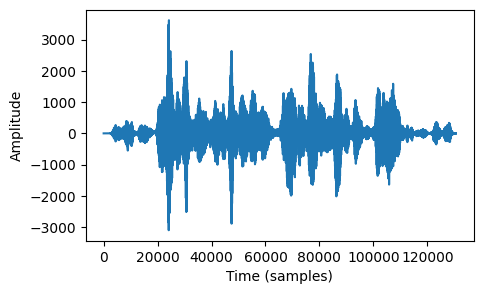

In [65]:
plt.figure(figsize=(5, 3))
plt.plot(mic_signals)
# plt.title("Mixed Signal at Microphone (Near-End + Far-End Noise)")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [68]:
wav.write("mixed.wav", 16000, mic_signals.astype(np.int16))
wav.write("near_end.wav", 16000, near_end_signal1_scaled.astype(np.int16))
wav.write("far_end1.wav", 16000, far_end_signal1_scaled.astype(np.int16))
wav.write("far_end2.wav", 16000, far_end_signal2_scaled.astype(np.int16))

In [125]:
play_raw_signal(far_end_signal2, "Mic")
play_raw_signal(far_end_signal2_scaled, "Mic")

Playing: Mic
Finished: Mic

Playing: Mic
Finished: Mic



In [77]:
def pad_with_silence(wav_file, silence_duration=1):
  sample_rate, data = wav.read(wav_file)
  silence_length = int(silence_duration * sample_rate)
  silence_data = np.zeros((silence_length,), dtype=data.dtype)
  padded_data = np.concatenate((silence_data, data, silence_data))
  return padded_data


In [195]:
padded_data = pad_with_silence(wavefile1, 1)
play_raw_signal(padded_data, "mic")

Playing: mic
Finished: mic

